# Import

In [1]:
###
%matplotlib notebook
import time
from qulab.sugar import connect
from qulab.job import Job
from qulab.storage.utils import save
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np, sympy as sy, visa
from collections import namedtuple, deque, defaultdict, OrderedDict, Counter
from scipy.optimize import curve_fit, least_squares as ls
import time, asyncio, sys, imp, pandas as pd
from tqdm import tqdm_notebook as tqdm
# from easydl import clear_output
from sklearn.cluster import KMeans
from qulab.math.qst import transformList, acquireVFromData, vToRho
from qulab.math import opt
from qulab import ezQ_inst, measure_new,ezQ_HS, measure_1027,ezQ_1027
from qulab import computewave, waveform, optimize, computewave_1027
op = imp.reload(optimize)
ezQ_inst = imp.reload(ezQ_1027)
wn = imp.reload(waveform)

cww = imp.reload(computewave_1027)
mrw = imp.reload(measure_1027)

Log file path: D:\QuLab\qulab\log\test\test.log


# 仪器

In [2]:
###
###33120
dc1 = await connect('DC1')
jpadc = await connect('DC2')##jpa直流源
dc3 = await connect('DC3')
dc4 = await connect('DC4')##Q5直流源

###微波源
psg_lo = await connect('PSG27')
psg_ex = await connect('PSG28')
psg_pump = await connect('PSG25')

###国盾
awg1 = ezQ_inst.DA('QF10K4N0050', '10.0.200.68')#读出
awg2 = ezQ_inst.DA('QF10K4N0075', '10.0.200.70')#XYA,XYB
awg3 = ezQ_inst.DA('QF10K4N0064', '10.0.200.69')#XYC,XYD
awg4 = ezQ_inst.DA('QF10K4N0034', '10.0.200.71')#Z_pulse

dcch1 = ezQ_inst.DC('DC1','10.0.200.72',5000,1)
dcch2 = ezQ_inst.DC('DC1','10.0.200.72',5000,2)
dcch3 = ezQ_inst.DC('DC1','10.0.200.72',5000,3)
dcch4 = ezQ_inst.DC('DC1','10.0.200.72',5000,4)

exch1 = [awg2,[1,2]]
exch2 = [awg2,[3,4]]
exch3 = [awg3,[1,2]]
exch4 = [awg3,[3,4]]

zch1 = [awg4,1]
zch2 = [awg4,2]
zch3 = [awg4,3]
zch4 = [awg4,4]

ad = ezQ_inst.AD('QE10K4N0016', '00-00-00-00-00-60', "B4-96-91-78-AB-0E")


## 仪器分配

In [3]:
psg = {
    'psg_lo':psg_lo,
    'psg_ex':psg_ex,
    'psg_trans':psg_lo,
    'psg_pump':psg_pump
}

dc = {
    'q1':dcch1,
    'q2':dcch2,
    'q3':dcch3,
    'q4':dcch4,
}

XY = {
    'q1':exch1,
    'q2':exch2,
    'q3':exch3,
    'q4':exch4,
}

Z = {
    'q1':zch1,
    'q2':zch2,
    'q3':zch3,
    'q4':zch4,
}

awg = {'awg1':awg1,
       'awg2':awg2, 
       'awg3':awg3,
       'awg4':awg4,
      }


z_ch1 = 1
z_ch2 = 2
z_ch3 = 3
z_ch4 = 4
z_ch5 = 1
z_ch6 = 2
z_ch7 = 3
z_ch8 = 4

# 比特参数

In [4]:
q1 = mrw.qubit(
    q_name='q1',
    inst={'dc':'q1',
          'z_awg':'awg4', 
          'z_ch':z_ch1,
          'lo_awg':'awg1',
          'lo_ch':[1,2],
          'ex_awg':'awg2',
          'ex_ch':[1,2],
          'psg_lo':'psg_lo',
          'att':'att1'
         },
    f_lo=np.array([6.505e9]), 
    delta=np.array([50e6]), 
    bias=1.3, 
    zpulse=None,
    f_ex=np.array([3.652e9]), 
    delta_ex=np.array([200e6]),
    pi_len=24,
    power_ex = 29000)
q2 = mrw.qubit(
    q_name='q2',
    inst={'dc':'dcch2',
          'z_awg':'awg4', 
          'z_ch':z_ch2,
          'lo_awg':'awg1',
          'lo_ch':[1,2],
          'ex_awg':'awg2',
          'ex_ch':[3,4],
          'psg_lo':'psg_lo',
          'att':'att2'
         },
    f_lo=np.array([6.518e9]), 
    delta=np.array([50e6]), 
    bias=1.3, 
    zpulse=None,
    f_ex=np.array([3.652e9]), 
    delta_ex=np.array([200e6]),
    pi_len=24,
    power_ex = 29000)
q3 = mrw.qubit(
    q_name='q3',
    inst={'dc':'dcch3',
          'z_awg':'awg4', 
          'z_ch':z_ch3,
          'lo_awg':'awg1',
          'lo_ch':[1,2],
          'ex_awg':'awg3',
          'ex_ch':[1,2],
          'psg_lo':'psg_lo',
          'att':'att3'
         },
    f_lo=np.array([6.52988e9]), 
    delta=np.array([50e6]), 
    bias=3, 
    zpulse=None,
    f_ex=np.array([3.652e9]), 
    delta_ex=np.array([200e6]),
    pi_len=24,
    power_ex = 29000)
q4 = mrw.qubit(
    q_name='q4',
    inst={'dc':'dcch4',
          'z_awg':'awg4', 
          'z_ch':z_ch4,
          'lo_awg':'awg1',
          'lo_ch':[1,2],
          'ex_awg':'awg3',
          'ex_ch':[3,4],
          'psg_lo':'psg_lo',
          'att':'att3'
         },
    f_lo=np.array([6.54137e9]), 
    delta=np.array([50e6]), 
    bias=2.8, 
    zpulse=None,
    f_ex=np.array([3.62e9]), 
    delta_ex=np.array([200e6]),
    pi_len=100,
    power_ex = 32000)
q5 = mrw.qubit(
    q_name='q5', 
    inst={'dc':'dcch5',
          'z_awg':'awg4',
          'z_ch':z_ch5,
          'lo_awg':'awg1',
          'lo_ch':[1,2],
          'ex_awg':'awg3',
          'ex_ch':[1,2],
          'psg_lo':'psg_lo',
          'att':'att5'},
    f_lo=np.array([6.55757e9]),
    delta=np.array([50e6]),
    bias=1.5, 
    zpulse=None,
    f_ex=np.array([3.62e9]), 
    delta_ex=np.array([200e6]),
    pi_len=68,
    power_ex = 29000)
q6 = mrw.qubit(
    q_name='q6',
        inst={'dc':'dcch6',
             'z_awg':'awg4',
             'z_ch':z_ch6,
             'lo_awg':'awg1',
             'lo_ch':[1,2], 
              'ex_awg':'awg3',
             'ex_ch':[3,4],
              'psg_lo':'psg_lo',
              'att':'att6'},
    f_lo=np.array([6.56739e9]), 
    delta=np.array([50e6]),
    bias=-1.3, 
    zpulse=None,
    f_ex=np.array([3.636e9]),
    delta_ex=np.array([200e6]),
    pi_len=60,
    power_ex = 20e3)
q7 = mrw.qubit(
    q_name='q7',
    inst={'dc':'dcch7',
          'z_awg':'awg4',
          'z_ch':z_ch7,
          'lo_awg':'awg1',
          'lo_ch':[1,2],
          'ex_awg':'awg1',
          'ex_ch':[1,2],
          'psg_lo':'psg_lo',
          'att':'att7'},
    f_lo=np.array([6.601e9]),
    delta=np.array([50e6]),
    bias=0.1, 
    zpulse=None,
    f_ex=np.array([3.7e9]), 
    delta_ex=np.array([200e6]),
    pi_len=20)
q8 = mrw.qubit(
    q_name='q8',
    inst={'dc':'dcch8',
          'z_awg':'awg4', 
          'z_ch':z_ch8,
          'lo_awg':'awg1',
          'lo_ch':[1,2],
          'ex_awg':'awg2',
          'ex_ch':[3,4],
          'psg_lo':'psg_lo',
          'att':'att8'
         },
    f_lo=np.array([6.6045e9]), 
    delta=np.array([50e6]), 
    bias=1.3, 
    zpulse=None,
    f_ex=np.array([3.652e9]), 
    delta_ex=np.array([200e6]),
    pi_len=24,
    power_ex = 29000)

In [32]:
qubits=[q1,q2,q3,q4,q5,q6,q7,q8]
caliqubits = [q1,q2,q3,q4]

f_cavity = np.array([6.505,6.518,6.53,6.542,6.55,6.568,6.587,6.601,6.6045,6.628])*1e9
f_ca = np.array([6.505,6.518,6.53,6.542,6.55,6.568,6.601,6.6045])*1e9
fc = np.array([6.505,6.518,6.53,6.542,6.55,6.568,6.601,6.6045]*1)*1e9

f_lo, delta, n = mrw.resn(fc)
freqall = {f'q{i+1}':j for i,j in enumerate(fc)}
califreqall = {f'q{i+1}':j for i,j in enumerate(f_ca[0:4])}


In [33]:
measure = mrw.common(ad,dc,psg,awg,XY,Z,n,qubits,caliqubits)
measure.delta =delta
measure.freqall=freqall
measure.f_lo = f_lo
measure.dcstate={caliqubits[i].q_name:0 for i in np.arange(len(caliqubits))}
measure.qubitToread=list([qubits[i].q_name for i in np.arange(len(qubits))])
measure.predict={qubits[i].q_name:0 for i in np.arange(len(qubits))}
measure.onwhich={qubits[i].q_name:0 for i in np.arange(len(qubits))}
measure.offwhich={qubits[i].q_name:0 for i in np.arange(len(qubits))}

In [7]:
###
Q6 = [-2.83231315e-02,  - 1.88411060e-02,  -2.56171059e-02,1 ]
Q3 = [1, -1.08536585e-02, -6.30313591e-03, -1.47421603e-02]
Q4 = [4.15911354e-02, 1, -2.12507013e-02, -2.14484257e-02]
Q5 = [2.56192648e-02, 1.85674370e-02, 1, -2.31954667e-02 ]


calimatrix=np.array([Q3,Q4,Q5,Q6])
calimatrix = np.eye(4)          ####测量crosstalk 矩阵时，选此项
calimatrix = np.mat(calimatrix)

# JPA开关

In [19]:
###ON
await jpadc.DC(2.1)
await psg_pump.setValue('Power',4.6)
await psg_pump.setValue('Frequency',13.452e9)
await psg_pump.setValue('Output','ON')
# await psg_pump.setValue('Output','OFF')
# await jpadc.DC(0)

# 链接仪器

In [9]:
for i in measure.awg:
    measure.awg[i].da_connect_device()
measure.ad.ad_connect_device()

QF10K4N0050 connect sucessful.


da board:[QF10K4N0050] connect success .


QF10K4N0075 connect sucessful.


da board:[QF10K4N0075] connect success .


QF10K4N0064 connect sucessful.


da board:[QF10K4N0064] connect success .


QF10K4N0034 connect sucessful.


da board:[QF10K4N0034] connect success .
0000


['频率(MHz)：79.99998331069946', '频率(MHz)：79.99998331069946', '频率(MHz)：79.99998331069946', '频率(MHz)：79.99998331069946', '频率(MHz)：79.99998331069946', '频率(MHz)：79.99998331069946', '频率(MHz)：79.99998331069946', '频率(MHz)：79.99998331069946']
['解模长度：2000', '解模长度：2000', '解模长度：2000', '解模长度：2000', '解模长度：2000', '解模长度：2000', '解模长度：2000', '解模长度：2000']
['解模窗口：2000', '解模窗口：2000', '解模窗口：2000', '解模窗口：2000', '解模窗口：2000', '解模窗口：2000', '解模窗口：2000', '解模窗口：2000']
['解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0']
['态判断参数A：0', '态判断参数A：0', '态判断参数A：0', '态判断参数A：0', '态判断参数A：0', '态判断参数A：0', '态判断参数A：0', '态判断参数A：0']
['态判断参数B：0', '态判断参数B：0', '态判断参数B：0', '态判断参数B：0', '态判断参数B：0', '态判断参数B：0', '态判断参数B：0', '态判断参数B：0']
['态判断参数C1：0', '态判断参数C1：0', '态判断参数C1：0', '态判断参数C1：0', '态判断参数C1：0', '态判断参数C1：0', '态判断参数C1：0', '态判断参数C1：0']
['态判断参数C2：0', '态判断参数C2：0', '态判断参数C2：0', '态判断参数C2：0', '态判断参数C2：0', '态判断参数C2：0', '态判断参数C2：0', '态判断参数C2：0']
已收到的触发个数：1000
已完成触发解模个数：1000
上位机读分段长度：80
AD 触发自适应状态：未完成xxx
SRAM校准状态：AD S

0

# 初始化仪器

In [10]:
depth = 2000
trig_count = 1000
trig_interval = 260e-6
mode = 1
amp = 32767.5  # 避免越界，比32768略小
ad_trig_delay = 43900e-9

In [34]:
#初始化
for i in measure.awg:
    measure.awg[i].da_init_device(trig_interval)
    measure.awg[i].da_trigg(trig_count)
measure.ad.ad_init_device()
#采集数据出发时间延迟
awg1.da_set_trig_delay(ad_trig_delay)#AWG主板
measure.ad.set_ad(depth, trig_count, mode=1)## 1,做傅里叶变换，频域信号；0，不做傅里叶变换，时域信号
measure.ad.ad_data_clear()
measure.ad.set_ad_freq(delta, depth, window_start=8)

1000
da board:[QE10K4N0016] set param success .


0

# 时域频域信号

In [35]:
p = cww.modulation_read(measure, measure.delta, readlen=measure.readlen)

<IPython.core.display.Javascript object>


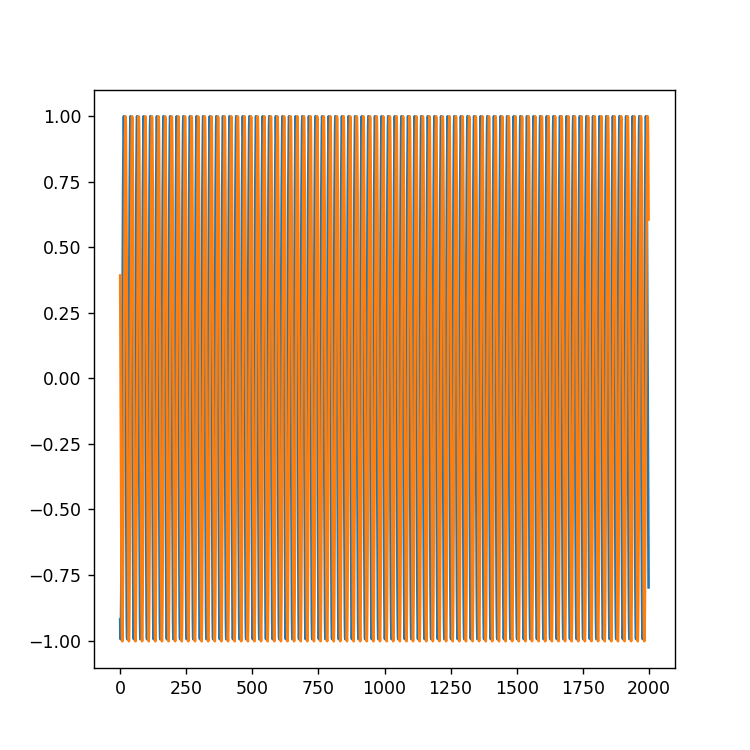

In [25]:
I0 = p[0][86360:88360]
Q0 = p[1][86360:88360]
plt.figure(figsize=(6,6))
plt.plot(I0/I0.max())
plt.plot(Q0/Q0.max())

In [23]:
await psg['psg_lo'].setValue('Power',22)

<IPython.core.display.Javascript object>


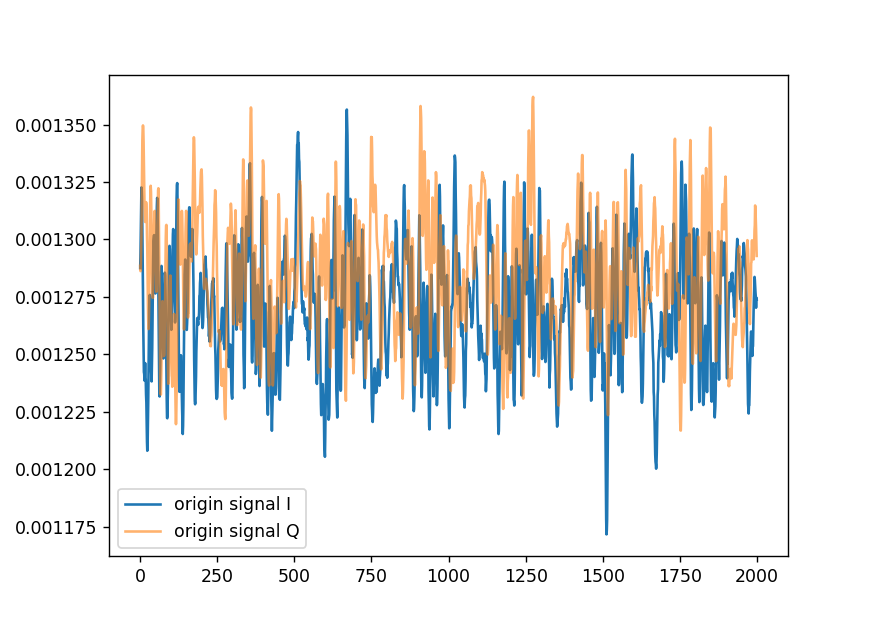

In [36]:
%matplotlib notebook
I, Q = 0, 0
await psg['psg_lo'].setValue('Output','ON')
await psg['psg_lo'].setValue('Frequency',measure.f_lo)

# await psg['psg_ex'].setValue('Output','OFF')
for i in range(1):
    chA, chB = measure.ad.getTraces()
    I += chA
    Q += chB
plt.figure(figsize=(7,5))
plt.plot(np.arange(len(I)), I,label='origin signal I')
plt.plot(np.arange(len(Q)), Q,label='origin signal Q',alpha=0.6)
#plt.plot(np.arange(len(Q)), np.sqrt(I**2+Q**2),'.',label='envelop')
plt.legend(loc="lower left")
plt.show()

[-19500000.  -6500000.   5500000.  17500000.  25500000.  43500000.
  76500000.  80000000.]


<IPython.core.display.Javascript object>


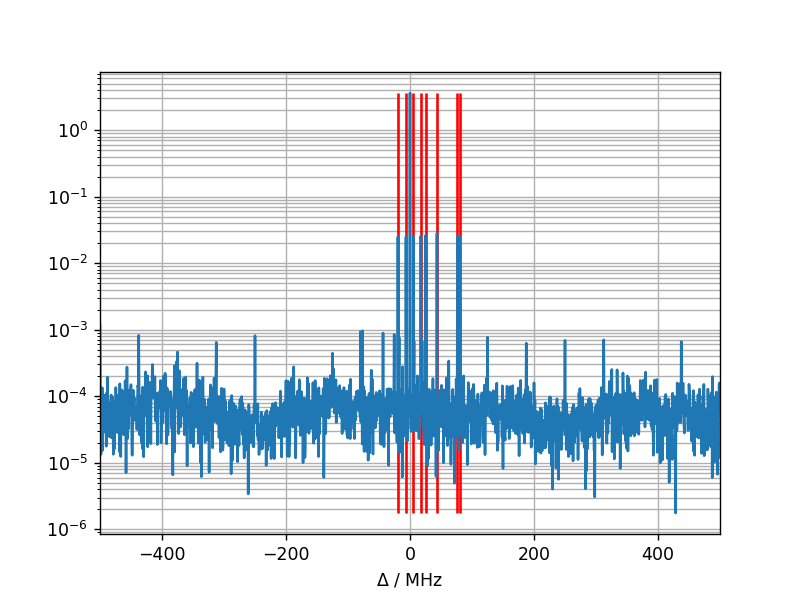

In [37]:
x = np.fft.fftshift(np.fft.fftfreq(len(I)))*1e9
y = np.fft.fftshift(np.fft.fft(I + 1j*Q))
Delta_list = measure.delta
print(Delta_list)
plt.figure()

plt.vlines(Delta_list/1e6, np.min(np.abs(y)), np.max(np.abs(y)), 'r')

plt.semilogy(x/1e6, np.abs(y))

plt.grid(which='both')
plt.xlabel(r'$\Delta$ / MHz')
plt.xlim(-500,500)
plt.show()

# S21

Output()

shape(f_s21)= (201, 8) 
 shape(s_s21)= (201, 8)
[102 101  94 100  99 101  96  96]
6522600000.0 [-19200000.  -5150000.   2100000.  17250000.  28300000.  42450000.
  80000000.  79950000.] 8


<IPython.core.display.Javascript object>


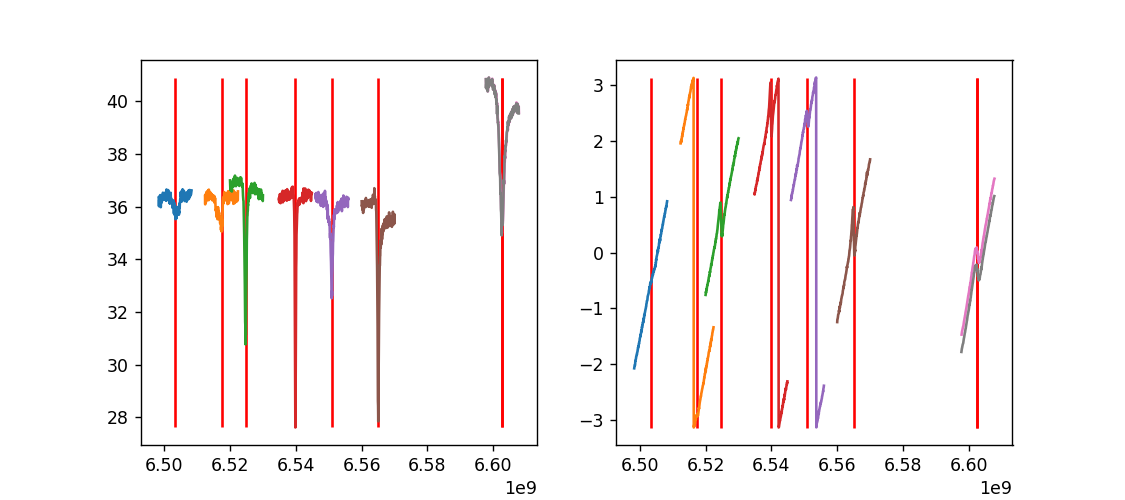

In [18]:
await measure.psg['psg_ex'].setValue('Output','OFF')
q_target = q1
freq = np.linspace(6.35,6.54,381)*1e9 
tag = q_target.q_name
dcstate={'q1':-2.5, 'q2':-2.7, 'q3':-1, 'q4':-3.3}
await mrw.dcManage(measure,'zpluse',dcstate={},readstate=None,calimatrix=None)
await mrw.dcManage(measure,'DC',dcstate=dcstate,readstate=None,calimatrix=None)
# await mr.jpa_switch(measure,state='ON')
f_lo, delta, n, f_res,base,f_s21, s_s21 = await mrw.again(q_target,measure,True,measure.f_lo)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f_s21,20*np.log10(np.abs(s_s21)))
axes[0].vlines(f_lo+delta,np.max(20*np.log10(np.abs(s_s21))),np.min(20*np.log10(np.abs(s_s21))),'r')
axes[1].vlines(f_lo+delta,np.max(np.angle(s_s21)),np.min(np.angle(s_s21)),'r')
axes[1].plot(f_s21,np.angle(s_s21))
plt.show()

In [18]:
measure.delta

array([39650000., 53350000., 63450000., 80000000., 39650000., 53350000.,
       63450000., 80000000.])

Output()

<IPython.core.display.Javascript object>


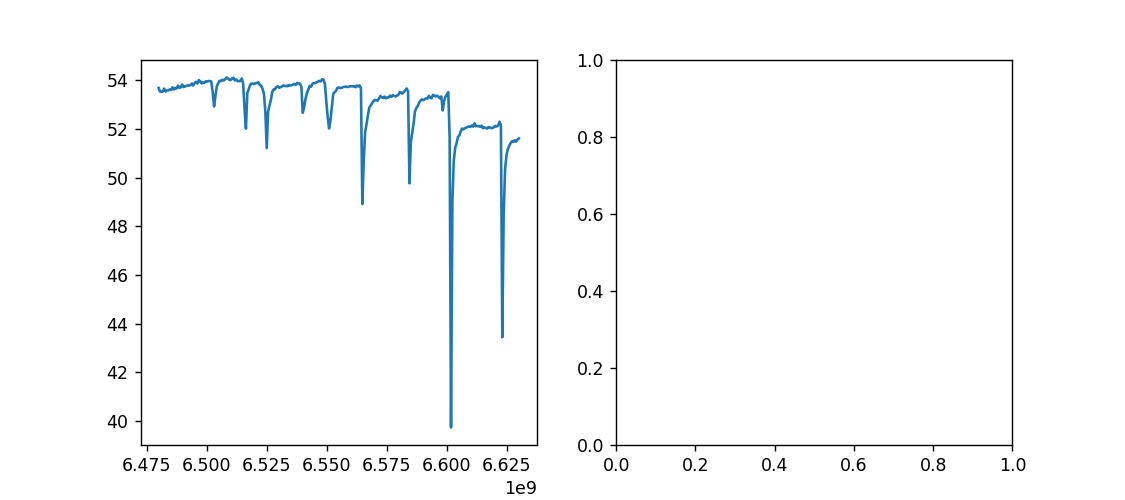

In [18]:
q_target = q1
# freq = np.linspace(6.35,6.54,51)*1e9
freq = np.linspace(6.48,6.63,261)*1e9 -80e6
job = Job(mrw.S21, (q_target,measure,False,f_lo,freq),auto_save=True,max=len(freq),tags=[q_target.q_name])
f_s21, s_s21 = await job.done()

fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f_s21[:,0],20*np.log10(np.abs(s_s21[:,0])))

# S21vsPower

In [19]:
async def S21vsPower(qubit,measure,read_amp,freq,modulation=False,bias_mode='zpluse',calimatrix=None):
    l = measure.readlen
    await mrw.dcManage(measure,'zpulse',dcstate={},readstate=None,calimatrix=calimatrix)
    for i in read_amp:
        cww.modulation_read(measure, measure.delta, read_amp=i,readlen=measure.readlen)
        job = Job(mrw.S21, (qubit,measure,modulation,measure.f_lo,freq),auto_save=True, no_bar=False)
        f_s21, s_s21 = await job.done()
        n = np.shape(s_s21)[1]
        yield [i]*n, f_s21, s_s21
    measure.readlen = l

Output()

<IPython.core.display.Javascript object>


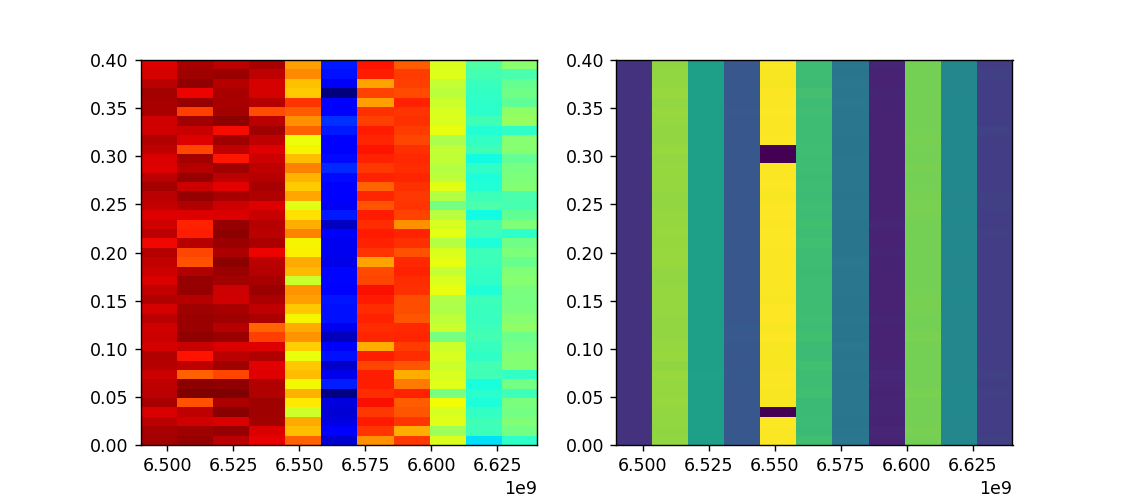

In [20]:
q_target, read_amp = q1, np.linspace(0,0.4,41)
# freq = np.linspace(-2.5,2.5,21)*1e6 + measure.f_lo
freq = np.linspace(6.49,6.64,11)*1e9 -80e6
tag = q_target.q_name
#await psg[q_target.inst['ex_lo']].setValue('Output','OFF')
job = Job(S21vsPower, (q_target,measure,read_amp,freq,True), tags=[tag], max=len(read_amp),auto_save=True)
att_p, f_p, s_p = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
extent = [np.min(f_p[0][:,0]),np.max(f_p[0][:,0]),np.min(att_p[:,0]),np.max(att_p[:,0])]
axes[0].imshow(np.abs(s_p[:,:,0]),extent=extent,origin='lower',aspect='auto',cmap='jet')
axes[1].imshow(np.angle(s_p[:,:,0]),extent=extent,origin='lower',aspect='auto')
plt.show()

# S21vsflux

In [17]:
freq = np.linspace(-2,2,41)*1e6 + measure.f_lo
# current, bias_mode = np.linspace(-30000,30000,11) , 'zpluse' ### Zpulse偏置用此
current, bias_mode = np.linspace(-6,6,101), 'DC'  ### DC偏置用此
await mrw.dcManage(measure,'zpluse',dcstate={},readstate=None,calimatrix=None)
await mrw.dcManage(measure,'DC',dcstate={},readstate=None,calimatrix=None)

In [18]:
bits = [q1]
for i in bits:
    print(i)
    tag = i.q_name
    print(tag)
    job = Job(mrw.S21vsFlux, (i,measure,current,None,freq,bias_mode), tags=[tag], max=len(current),auto_save=True)
    v_bias, f_bias, s_bias = await job.done()

q1


Output()

In [ ]:
freq = np.linspace(-2,2,41)*1e6 + measure.f_lo
current, bias_mode = np.linspace(-30000,30000,101) , 'zpluse' ### Zpulse偏置用此
# current, bias_mode = np.linspace(-6,6,101), 'DC'  ### DC偏置用此
await mrw.dcManage(measure,'zpluse',dcstate={},readstate=None,calimatrix=None)
await mrw.dcManage(measure,'DC',dcstate={},readstate=None,calimatrix=None)

In [ ]:
bits = [q4,q1,q3,q2]
for i in bits:
    print(i)
    tag = i.q_name
    print(tag)
    job = Job(mrw.S21vsFlux, (i,measure,current,None,freq,bias_mode), tags=[tag], max=len(current),auto_save=True)
    v_bias, f_bias, s_bias = await job.done()

In [ ]:
await mrw.dcManage(measure,'zpluse',dcstate={},readstate=None,calimatrix=None)
await mrw.dcManage(measure,'DC',dcstate={},readstate=None,calimatrix=None)

In [ ]:
async def JPAS21vsFlux(q_target,measure,current,calimatrix,freq,bias_mode='zpluse',modulation=False):
    for i in current:
        await dc4.DC(i)
        job = Job(mrw.S21, (q_target,measure,False,f_lo,freq),auto_save=True,max=len(freq),tags=[q_target.q_name])
        fs21, ss21 = await job.done()
        n = np.shape(s_s21)[1]
        yield [i]*n, fs21, ss21

In [117]:
q_target=q5
freq = np.linspace(-4,4,81)*1e6 + measure.f_lo
current=np.linspace(-5,5,121)
job = Job(JPAS21vsFlux, (q_target,measure,current,None,freq,bias_mode), tags=[tag], max=len(current),auto_save=True)
v_bias, f_bias, s_bias = await job.done()

Output()

# singlespec

In [453]:
await measure.psg['psg_ex'].setValue('Output','OFF')
await measure.psg['psg_lo'].setValue('Output','ON')

In [147]:
await mrw.dcManage(measure,'zpluse',dcstate={},readstate=None,calimatrix=None)

{}
zpluse_bias =  
 []


In [30]:
dcstate

{'q1': -2.5, 'q2': -2.7, 'q3': -1, 'q4': -3.3}

In [34]:
q_target = q3
# dcstate={'q1':-2.5, 'q2':-2.7, 'q3':0, 'q4':-3.3}
freq = np.arange(3.3,3.8,0.001)*1e9
await measure.psg['psg_ex'].setValue('Power',-15)
await mrw.dcManage(measure,'zpluse',dcstate={},readstate=None,calimatrix=None)
await mrw.dcManage(measure,'DC',dcstate=dcstate,readstate=None,calimatrix=None)

# await mrw.jpa_switch(measure,'ON')   ##False
job = Job(mrw.singlespec, (q_target,measure,freq,False,measure.f_lo,False), tags=[q_target.q_name], max=len(freq))
f_ss, s_ss = await job.done()
# state = await mrw.QueryInst(measure)
index = np.abs(s_ss).argmax(axis=0)
x,y,z,band= f_ss/1e9, s_ss,[],[]
for i in range(np.shape(s_ss)[1]):
    try:
        a,b,c,d,e = op.Lorentz_Fit().fitLorentz(x[:,i],np.abs(y[:,i]))
        z.append(a/(1.0+c*(x[:,i]-b)**2)+d)
        band.append((b,e))
    except:
        pass
z = np.array(z).T
f_rabi = np.array([x[:,i][j] for i, j in enumerate(index)])
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(x,np.abs(y),'-o',markersize=2)
# axes[0].plot(x,z,alpha=0.5)
# axes[0].set_title(f'f={np.array(band)[:,0]}GHz')
print(band)
axes[1].plot(x,np.angle(y))
plt.show()

Output()

<IPython.core.display.Javascript object>

[]


In [65]:
index = np.abs(s_ss).argmax(axis=0)
f_ex = f_ss[index]
f_ex

array([[3.170e+09, 3.170e+09, 3.170e+09, 3.170e+09, 3.170e+09, 3.170e+09,
        3.170e+09, 3.170e+09],
       [3.118e+09, 3.118e+09, 3.118e+09, 3.118e+09, 3.118e+09, 3.118e+09,
        3.118e+09, 3.118e+09],
       [3.170e+09, 3.170e+09, 3.170e+09, 3.170e+09, 3.170e+09, 3.170e+09,
        3.170e+09, 3.170e+09],
       [3.118e+09, 3.118e+09, 3.118e+09, 3.118e+09, 3.118e+09, 3.118e+09,
        3.118e+09, 3.118e+09],
       [3.170e+09, 3.170e+09, 3.170e+09, 3.170e+09, 3.170e+09, 3.170e+09,
        3.170e+09, 3.170e+09],
       [3.118e+09, 3.118e+09, 3.118e+09, 3.118e+09, 3.118e+09, 3.118e+09,
        3.118e+09, 3.118e+09],
       [3.170e+09, 3.170e+09, 3.170e+09, 3.170e+09, 3.170e+09, 3.170e+09,
        3.170e+09, 3.170e+09],
       [3.118e+09, 3.118e+09, 3.118e+09, 3.118e+09, 3.118e+09, 3.118e+09,
        3.118e+09, 3.118e+09]])

In [66]:
q3.f_ex=np.array([3.169e+09])

# Rabi

In [67]:
q_target = q3
q_target.replace(power_ex =20000)                         ######激励电压,只能取[0,32000]
# q_target.replace(power_ex =12860)                         
t_rabi = np.linspace(1,200,200)
# await att[q_target.inst['att']].set_att(22)
await measure.psg['psg_ex'].setValue('Power',22)
# await measure.psg['psg_lo'].setValue('Power',22)
await measure.psg['psg_lo'].setValue('Output','ON')


job = Job(mrw.Rabi, (q_target,measure,t_rabi,calimatrix,dcstate), tags=[q_target.q_name], max=len(t_rabi))
t_r, s_r = await job.done()

Output()

<IPython.core.display.Javascript object>


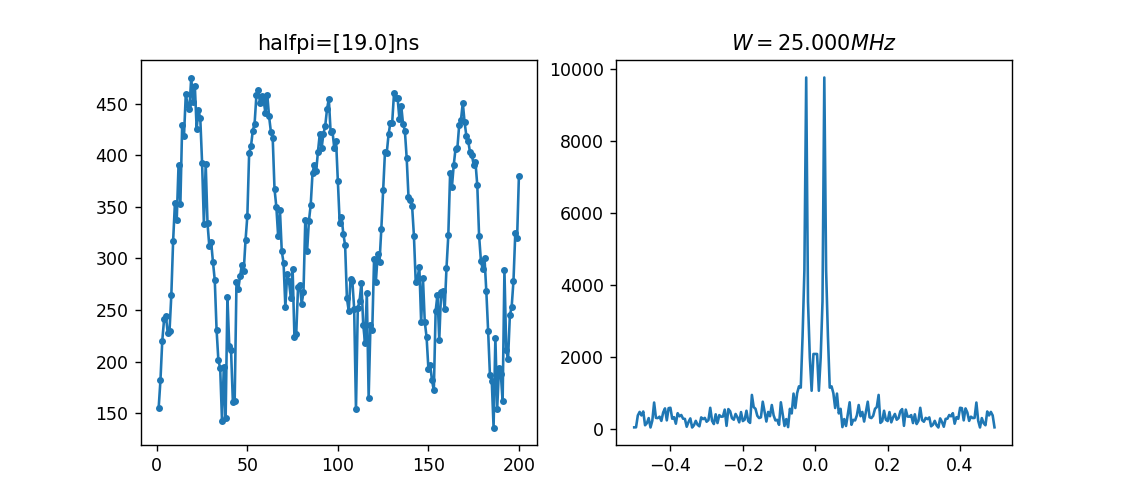

In [68]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
t_op = []
qn = 2
x, y = t_r[:,qn], np.abs(s_r[:,qn])
t_op.append(op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.8))

w,yt,amp = op.RowToRipe().fourier(x,y)
axes[0].plot(x,y,'-o',markersize=3)
axes[0].set_title(f'halfpi={t_op}ns')
axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
axes[1].set_title('$W=%.3fMHz$'%(w*1000))
plt.show()

In [69]:
q_target.replace(pi_len =19*2)

# PowerRabi

In [39]:
# q_target = q1
power = np.linspace(100,32000,101)

tag = q_target.q_name
await measure.psg['psg_lo'].setValue('Output','ON')

tag = q_target.q_name
job = Job(mrw.RabiPower, (q_target,measure,power,calimatrix,dcstate), tags=[tag], max=len(t_rabi))
t_rp, s_rp = await job.done()

Output()

<IPython.core.display.Javascript object>


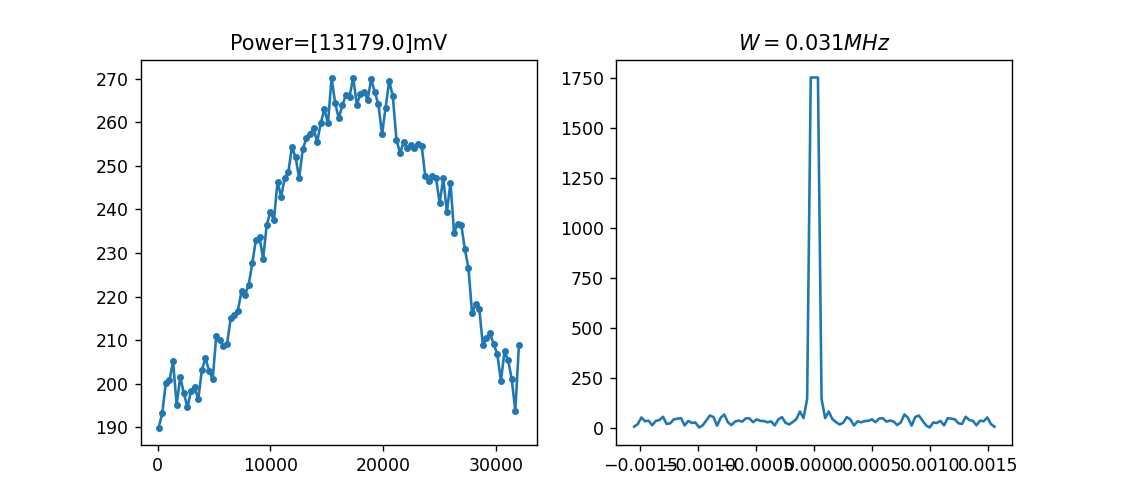

In [40]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
t_op = []
x, y = t_rp[:,qn], np.abs(s_rp[:,qn])
t_op.append(op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.8))
w,yt,amp = op.RowToRipe().fourier(x,y)
axes[0].plot(x,y,'-o',markersize=3)
axes[0].set_title(f'Power={t_op}mV')
axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
axes[1].set_title('$W=%.3fMHz$'%(w*1000))
plt.show()

# Ramsey

In [36]:
q_target.pi_len

24

In [86]:
# q_target = q1
t_T1 = np.linspace(0,2000,401)
tags=q_target.q_name

job = Job(mrw.Ramsey, (q_target,measure,t_T1,calimatrix,dcstate), tags=[tags], max=len(t_T1))
t_t1, s_t1 = await job.done()

Output()

<IPython.core.display.Javascript object>


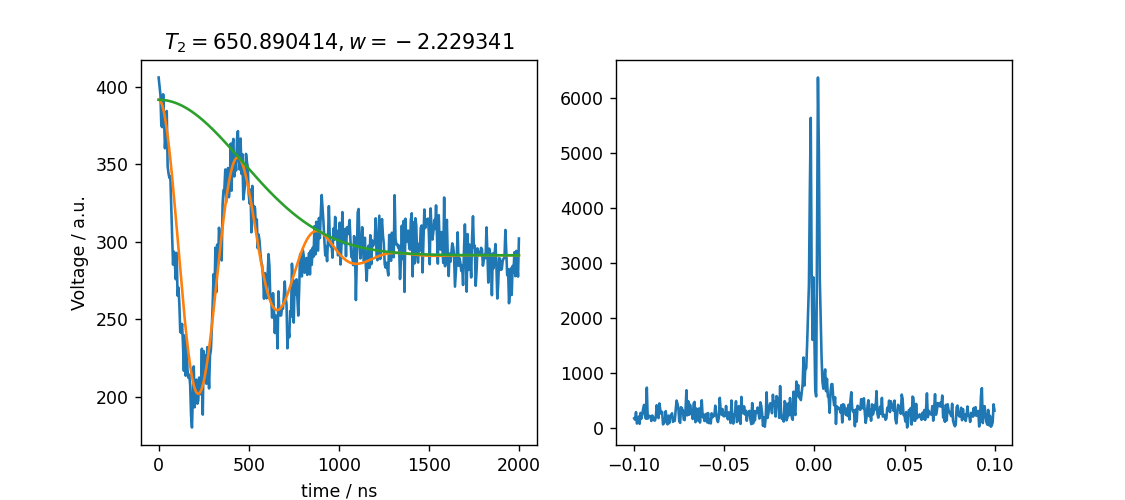

In [87]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(t_t1[:,qn],np.abs(s_t1[:,qn]),'-')
# axes[1].plot(t_t,np.angle(s_t))
plt.show()

In [88]:
fig = plt.gcf()
ax = plt.getp(fig,'axes')
num = 1
for i in range(num):
    x, y  = t_t1[:,qn], s_t1[:,qn]
    sample = (np.max(x) - np.min(x))/(len(x) - 1)
    yt  = np.fft.fftshift(np.fft.fftfreq(len(y))) / sample
    amp = np.fft.fftshift(np.fft.fft(y))
    A,B,T1,T2,w,phi,out = op.T2_Fit(funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
    z = A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
    z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
    env = out[0]*np.exp(-(x/out[3])**2-x/out[2]/2)+out[1]
    ax[i].plot(x,z)
    ax[i].plot(x,z_env)
#     ax[i].plot(x,out[-1])
#     ax[i].set_title('$T_{1}=%f,T_{2}=%f,w=%f$'%(T1,T2,w*1e3))
    ax[i].set_title('$T_{2}=%f,w=%f$'%(T2,w*1e3))
    #ax[i].set_title('$T_{2}=%f$'%T2)
    ax[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
    ax[i].set_xlabel('time / ns')
    ax[i].set_ylabel('Voltage / a.u.')
plt.show()

d:\qulab\qulab\optimize.py:126: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)
d:\qulab\qulab\optimize.py:126: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)
d:\qulab\qulab\optimize.py:126: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


(113.02299795886812, -189.93443426528992, 35000, 503.2, 0.00199501246882793, 0)


d:\qulab\qulab\optimize.py:255: RuntimeWarning: overflow encountered in exp
  return np.sum((A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B - y)**2)
d:\qulab\qulab\optimize.py:255: RuntimeWarning: overflow encountered in square
  return np.sum((A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B - y)**2)


In [84]:
f = await psg_ex.getValue('Frequency')
await psg_ex.setValue('Frequency',(f+w*1e9-2e6))
print(f)

2966910835.04


In [85]:
q_target.f_ex = f+w*1e9-2e6 + q_target.delta_ex
q_target.f_ex

array([3.16704797e+09])

In [80]:
await psg_ex.getValue('Power')

22.0

# Spinecho

In [115]:
# q_target = q3
t_spin= np.linspace(0,20000,101)
tag=q_target.q_name

job = Job(mrw.SpinEcho, (q_target,measure,t_spin,'CPMG',calimatrix,dcstate), tags=[tag], max=len(t_spin))
t_sp, s_sp = await job.done()

Output()

<IPython.core.display.Javascript object>


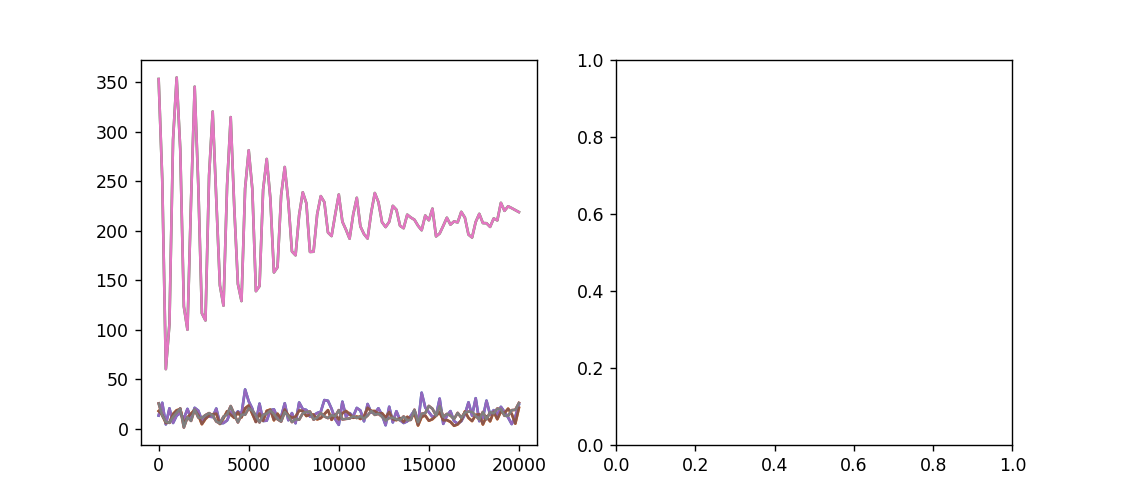

In [116]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(t_sp,np.abs(s_sp),'-')
# axes[1].plot(t_t,np.angle(s_t))
plt.show()

d:\qulab\qulab\optimize.py:126: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


(132.68552213499476, 223.84949194907625, 20718.3466483931, 6859.442833690924, 0.0009900990099009901, 0)


<IPython.core.display.Javascript object>


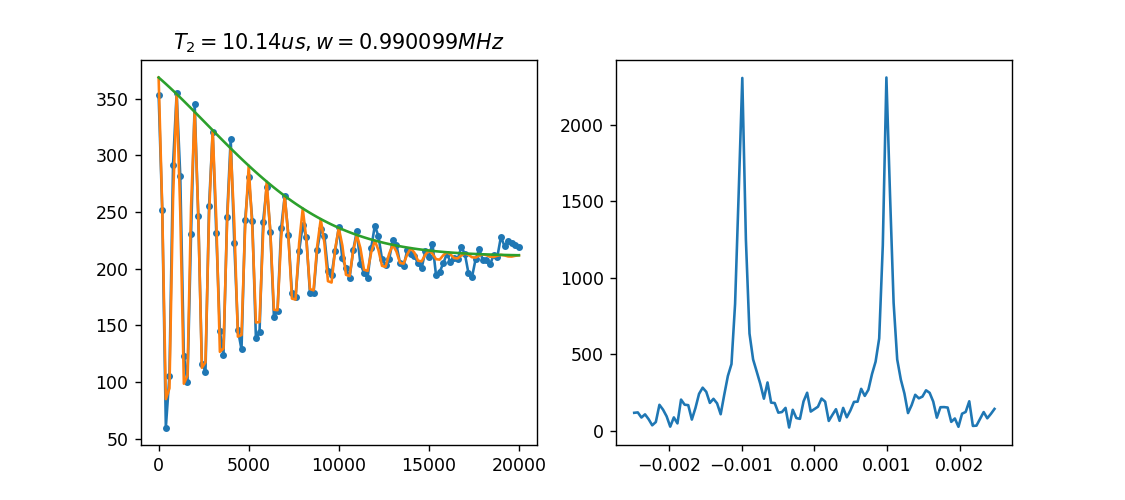

In [117]:
x, y = t_sp[:,qn], s_sp[:,qn]
A,B,T1,T2,w,phi,out = op.T2_Fit(T1=20000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
z = A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(x,np.abs(y),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}=%.2fus,w=%fMHz$'%(np.abs(T2/1000),w*1e3))
axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()

# T1

In [46]:
q_target.pi_len=100

In [221]:
# q_target = q3
t_T1 = np.linspace(0,44000,201)
# q_target.replace(power_ex =30000) ##q_target.power_ex       ###激励电压
# dcstate={'q1':1.1, 'q2':0.45, 'q3':3, 'q4':2.8}

job = Job(mrw.T1, (q_target,measure, t_T1, calimatrix,dcstate), tags=[tag], max=len(t_T1))
t_t, s_t = await job.done()

Output()

<IPython.core.display.Javascript object>


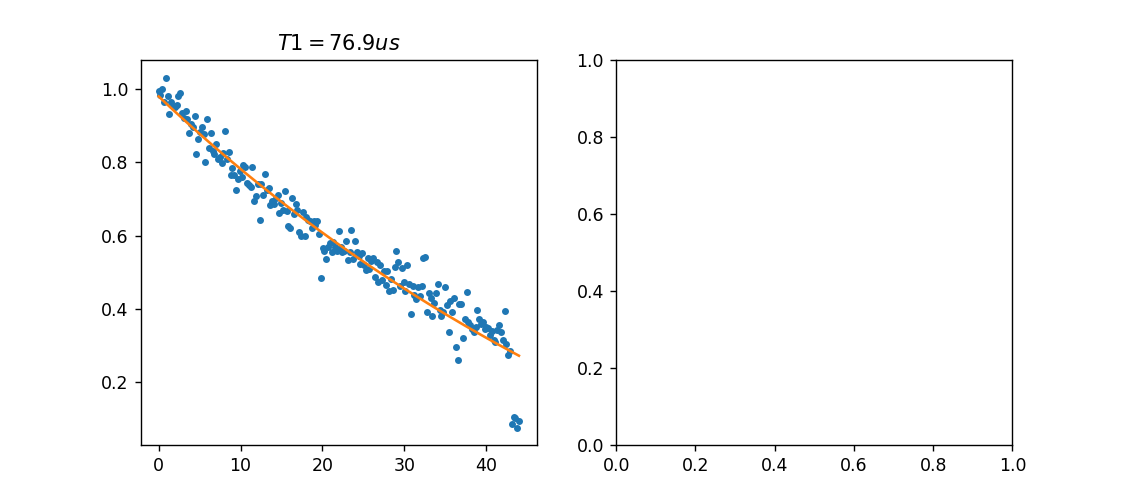

In [222]:
A, B, T1 = op.Exp_Fit().fitExp(t_t[:,qn]/1000,np.abs(s_t[:,qn]))
z = A * np.exp(-t_t[:,qn]/1000*T1) + B
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(t_t[:,qn]/1000,np.abs(s_t[:,qn]),'.')
axes[0].plot(t_t[:,qn]/1000,z)
axes[0].set_title('$T1=%.1fus$'%(1/T1))
# axes[1].plot(t_t,np.angle(s_t))
plt.show()

In [175]:
qubits = [q1,q1]
# dcstate={'q1':1, 'q2':0.5, 'q3':3, 'q4':2.8}
# t_rabi = np.linspace(0,200,101)
v_rabi = np.linspace(-30000,0,6)
job = Job(mrw.T1_2d,(qubits, measure, t_T1, v_rabi,calimatrix,dcstate), tags=[qubits[0].q_name,qubits[1].q_name], max=len(t_T1) )
t_vp,v_vp, s_vp = await job.done()

Output()

In [177]:
caliqubits

# crosstalk

In [572]:
await measure.psg['psg_ex'].setValue('Power',22)
# await measure.psg['psg_ex'].setValue('Power',-15)

In [564]:
target_qubit = q3
bias_qubit = q2
compenlist =np.linspace(-50,50,101)
biaslist = np.linspace(-30000,30000,21)

tags=[target_qubit.q_name,bias_qubit.q_name]

job = Job(mrw.Crosstalk, (target_qubit,bias_qubit,measure,compenlist,biaslist,dcstate), tags=tags, max=len(compenlist))

v_s2, f_s2, s_s2 = await job.done()

Output()

In [41]:
compenlist =np.linspace(-1000,1000,3)
biaslist = np.linspace(-30000,30000,3)
for i in caliqubits:
    t_qubit = i
    for j in caliqubits:
        if t_qubit!=j:
            b_qubit=j
            tags=[t_qubit.q_name,b_qubit.q_name]
            print(tags)
            
            job = Job(mrw.Crosstalk, (t_qubit,b_qubit,measure,compenlist,biaslist,dcstate),auto_save=True, tags=tags, max=len(compenlist))
            v_s2, f_s2, s_s2 = await job.done()

['q1', 'q2']
['q1', 'q3']
['q1', 'q4']
['q2', 'q1']
['q2', 'q3']
['q2', 'q4']
['q3', 'q1']
['q3', 'q2']
['q3', 'q4']
['q4', 'q1']
['q4', 'q2']
['q4', 'q3']


# Spec2D

In [654]:
await measure.psg['psg_ex'].setValue('Power',-15)
freq = np.arange(2.8,4.1,0.001)*1e9
bits = [q3]
bias_mode, current = 'DC',  np.linspace(-2,2,41)### DC偏置用此
# bias_mode, current ='zpluse', np.linspace(-20000,20000,3)### zpulse偏置用此

# await att6.set_att(30)
for k, i in enumerate(bits):
#     await mr.jpa_switch(measure,'ON')
    print(i.q_name)
    
    job = Job(mrw.spec2d, (i,measure,freq,current,calimatrix,bias_mode,True), tags=[i.q_name], max=len(current),auto_save=True)
#     spec2d(qubit,measure,freq,calimatrix,modulation=False)
    v_s2, f_s2, s_s2 = await job.done()

q3


Output()

# 优化pi脉冲

In [721]:
q_target, nwave, wavlen = q3, 10, len(t_rabi)
tag = q_target.q_name
#await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
job = Job(mrw.pipulseOpt, (q_target,measure,calimatrix,dcstate,nwave,wavlen), tags=[tag], max=nwave,auto_save=True)
n_pi, t_pi, s_pi = await job.done()

Output()

<IPython.core.display.Javascript object>


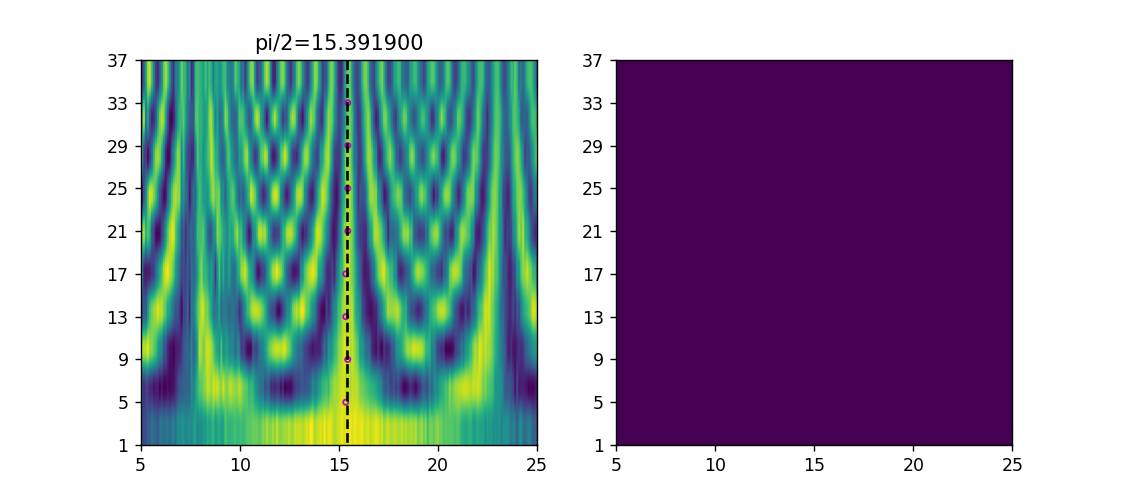

C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if __name__ == '__main__':


In [724]:
qn=2
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
x, y, s = n_pi[:,qn],t_pi[0][:,qn], np.abs(s_pi[:,:,qn])
index = y[np.argmax(np.abs(s),axis=1)[qn]]
extent = [np.min(y),np.max(y),np.min(x),np.max(x)]
axes[0].set_yticks(x)
axes[0].imshow(np.abs(s),extent=extent,origin='lower',aspect='auto')
yop = np.array([op.RowToRipe().firstMax(y,z,num=15.5,peakpercent=0.9,insitu=True) for z in s])
axes[0].scatter(yop[1:-1],x[1:-1],marker='.',c='',edgecolors='m')
axes[0].vlines(np.mean(yop),np.max(x),np.min(x),'k','--')
axes[0].set_title('pi/2=%f'%np.mean(yop))
axes[1].set_yticks(x)
axes[1].imshow(np.angle(s),extent=extent,origin='lower',aspect='auto')
plt.show()

# 优化读出点

Output()

<IPython.core.display.Javascript object>


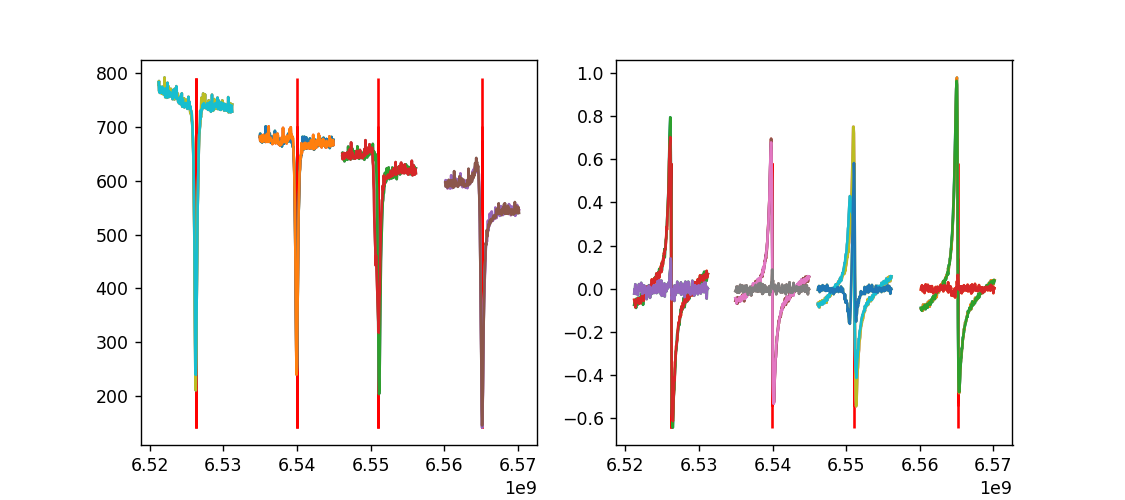

In [277]:
q_target = q1
job = Job(mrw.readOp, (measure,q_target), tags=[q_target.q_name], max=2)
st, f_op, s_op= await job.done()
f_lo = []
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
for i in range(measure.n):
    f, s_off, s_on = f_op[:,:,i][0], s_op[:,:,i][0], s_op[:,:,i][1]
    f_lo1 = (f[np.argmin(np.abs(s_off))] + f[np.argmin(np.abs(s_on))])/2
    x_off, y_off = op.RowToRipe().deductPhase(f,s_off)
    x_on, y_on = op.RowToRipe().deductPhase(f,s_on)
    anglediff = (np.angle(y_off[0])-np.angle(y_on[0]))
    index = np.abs(anglediff).argmax(axis=0)
    #index = np.abs(s_off).argmin(axis=0)
    f_lo.append(f[index] if np.abs(f[index]-f_lo1)<0.1e6 else f_lo1)
    axes[0].plot(f_op[:,:,i].T,np.abs(s_op[:,:,i].T))
    axes[0].vlines(f_lo,np.max(np.abs(s_op[:,:,i].T)),np.min(np.abs(s_op[:,:,i].T)),'r')
    axes[1].plot(x_off,np.angle(y_off[0]))
    axes[1].plot(x_on,np.angle(y_on[0]))
    axes[1].plot(x_off,anglediff)
    axes[1].vlines(f_lo,np.max(anglediff),np.min(np.angle(y_off[0])),'r')
plt.show()

# 临界判断

Output()

500
da board:[QE10K4N0016] set param success .


<IPython.core.display.Javascript object>


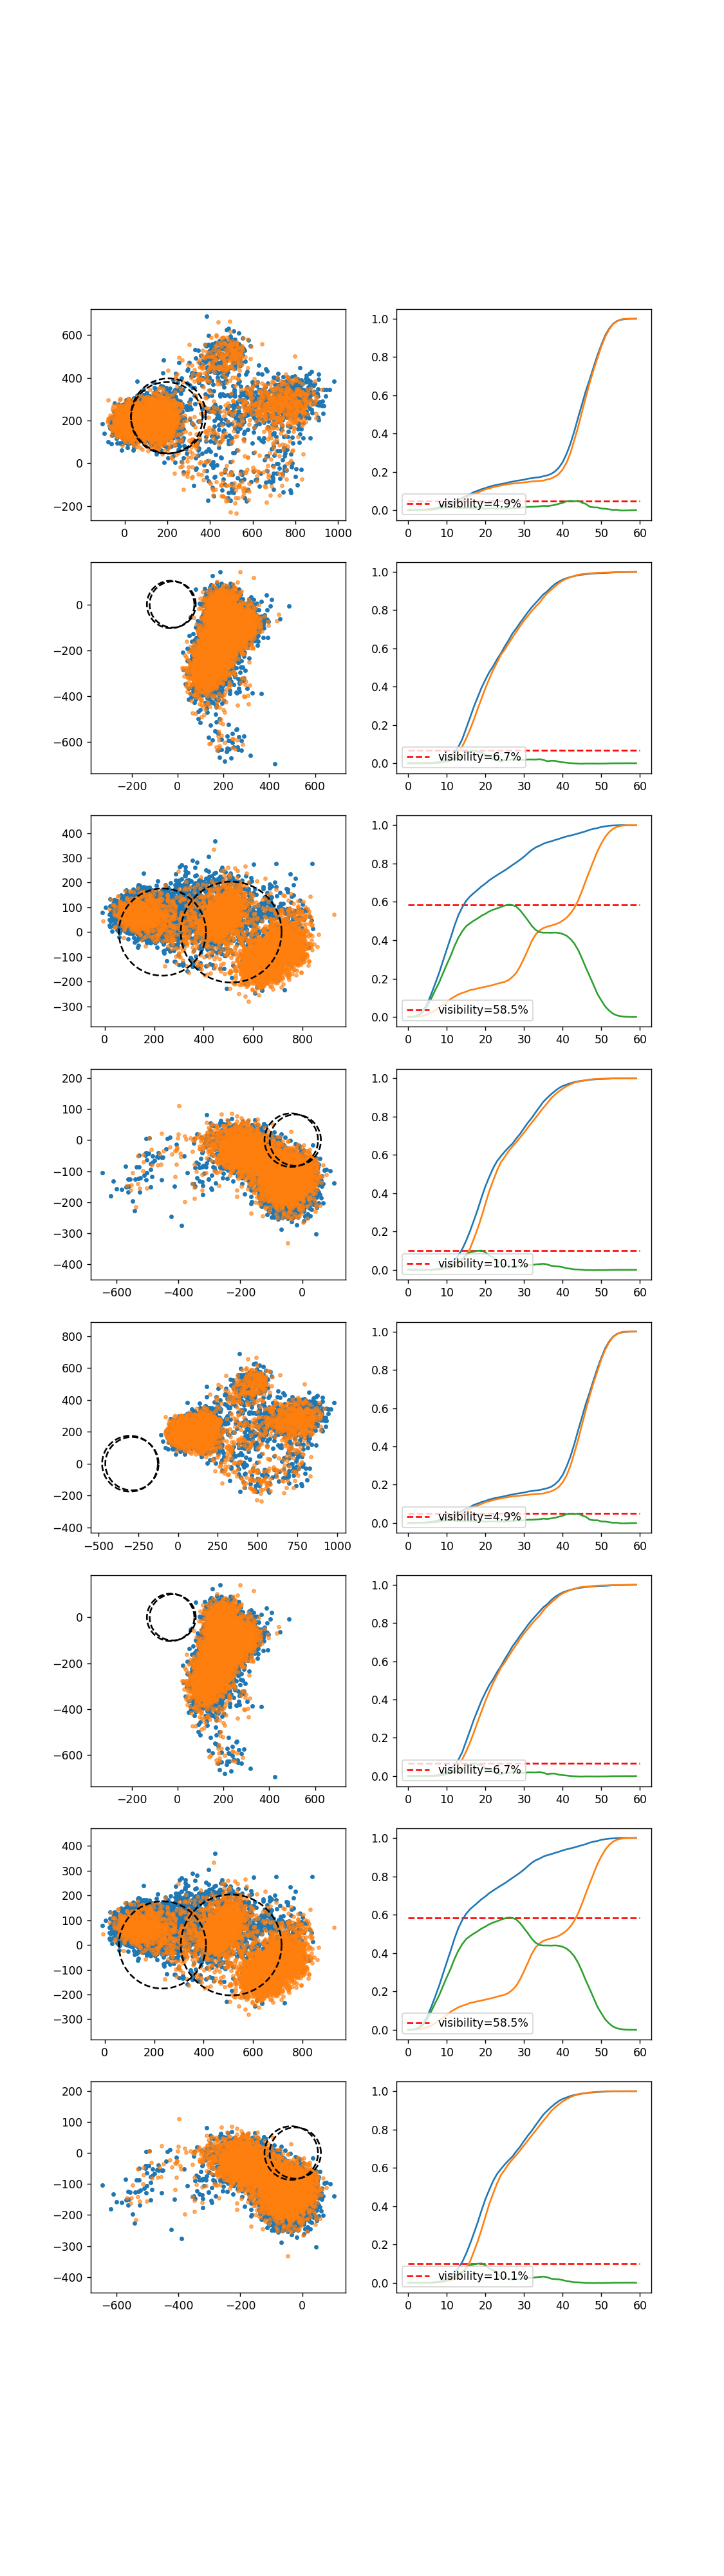

In [734]:
q_target = q3
# await att6.set_att(20)
job = Job(mrw.threshHold, (measure,q_target), tags=[q_target.q_name], max=2)
st, s_st= await job.done()
cww.ats_setup(measure,measure.readlen,repeats=measure.trig_count) 
num = measure.n
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
for i in range(measure.n):
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    data = await mrw.visibility(measure.n,s_off,s_on)
    ax0 = axes[i][0] if num>1 else axes[i]
    ax0.plot(np.real(s_off),np.imag(s_off),'.')
    ax0.plot(np.real(s_on),np.imag(s_on),'.',alpha=0.6)
    ax0.plot(*(data[i][3]),'k--')
    ax0.plot(*(data[i][4]),'k--')
    ax0.axis('equal')
    ax1 = axes[i][1] if num>1 else axes[i+1]
    for j in data[i][:3]:
        ax1.plot(j)
    maxdata = np.max(data[i][2])
    ax1.hlines(maxdata,0,60,'r','--',label=f'visibility={round(maxdata*100,1)}%')
    ax1.legend(loc='lower left')
#     ax.vlines([0],10,-100)
#     ax.hlines([0],-10,100)

plt.show()

<IPython.core.display.Javascript object>


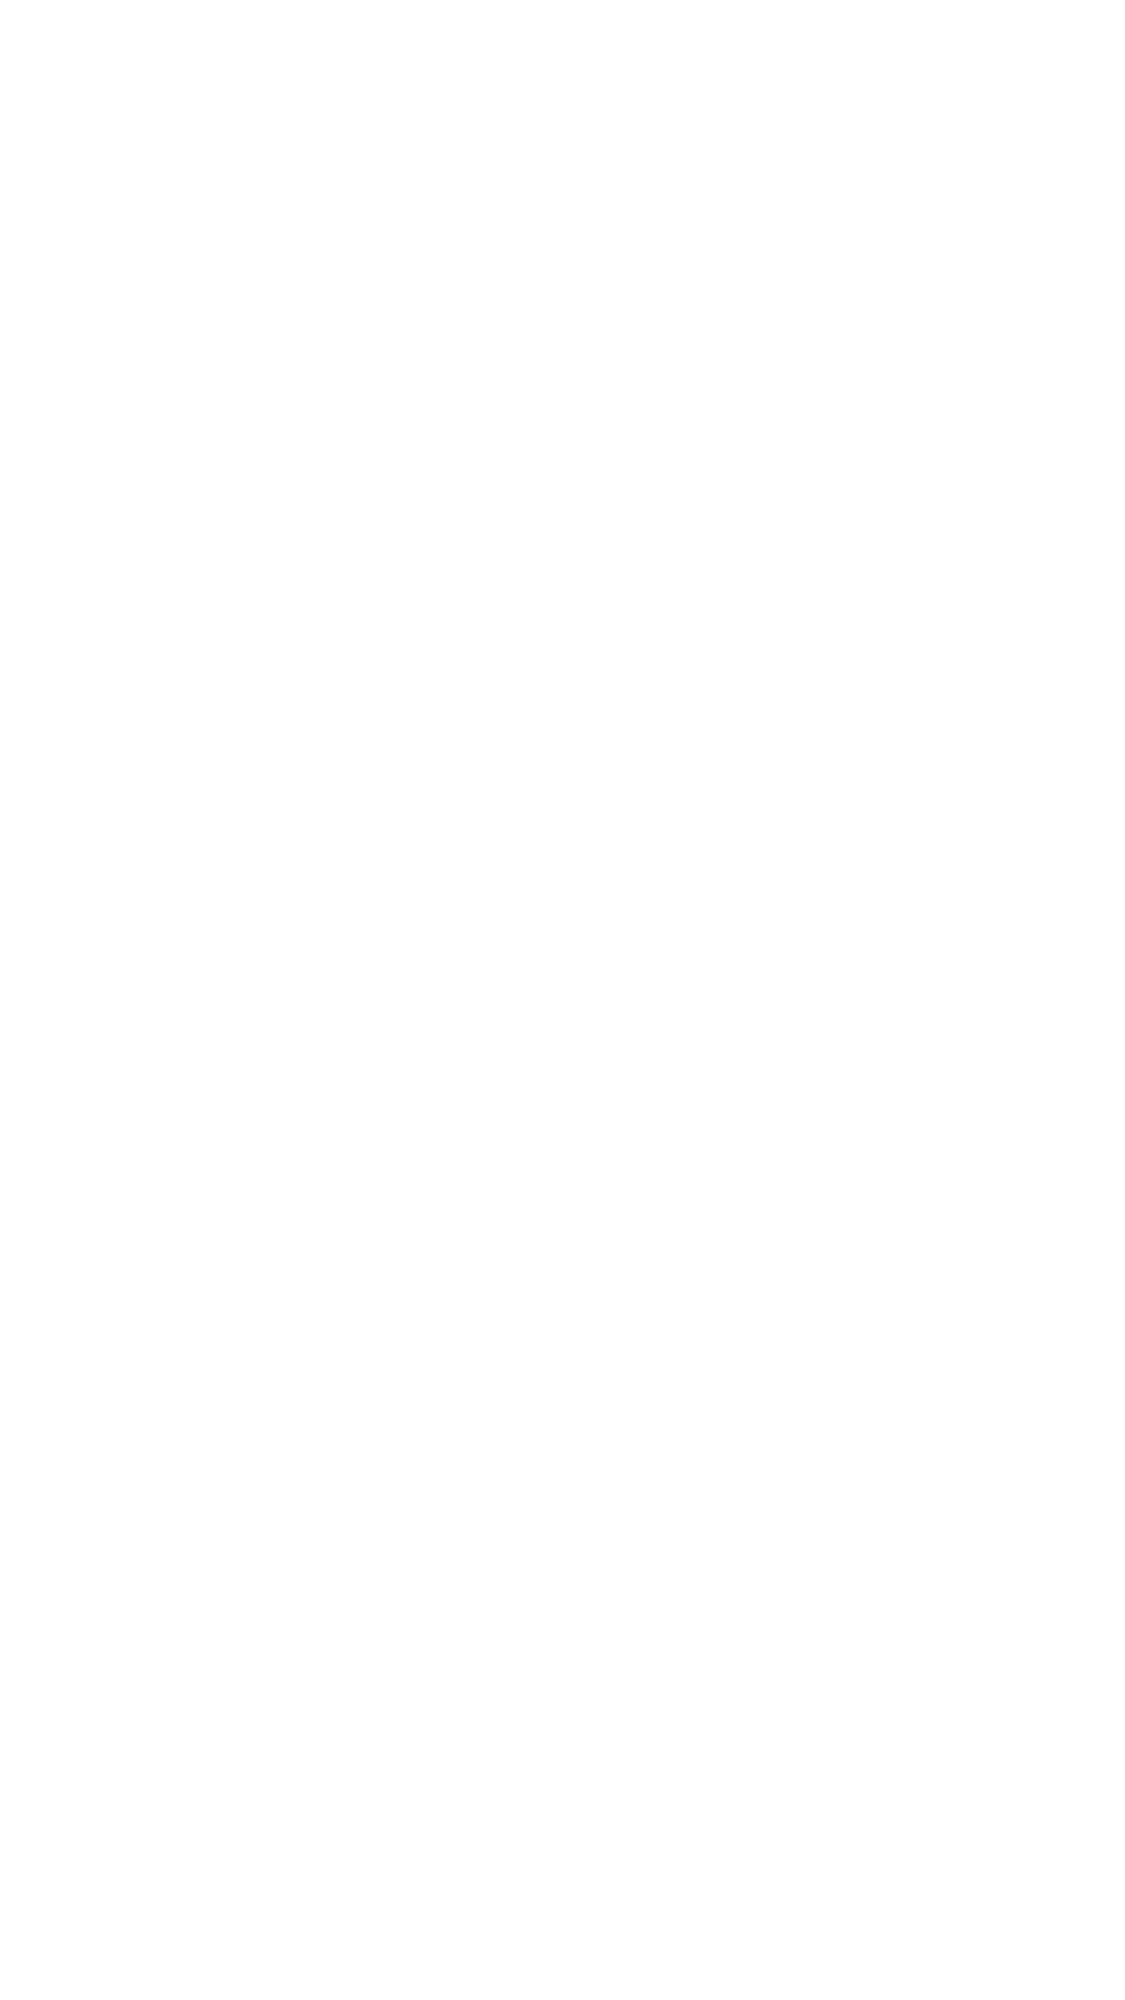

0.4789


<IPython.core.display.Javascript object>


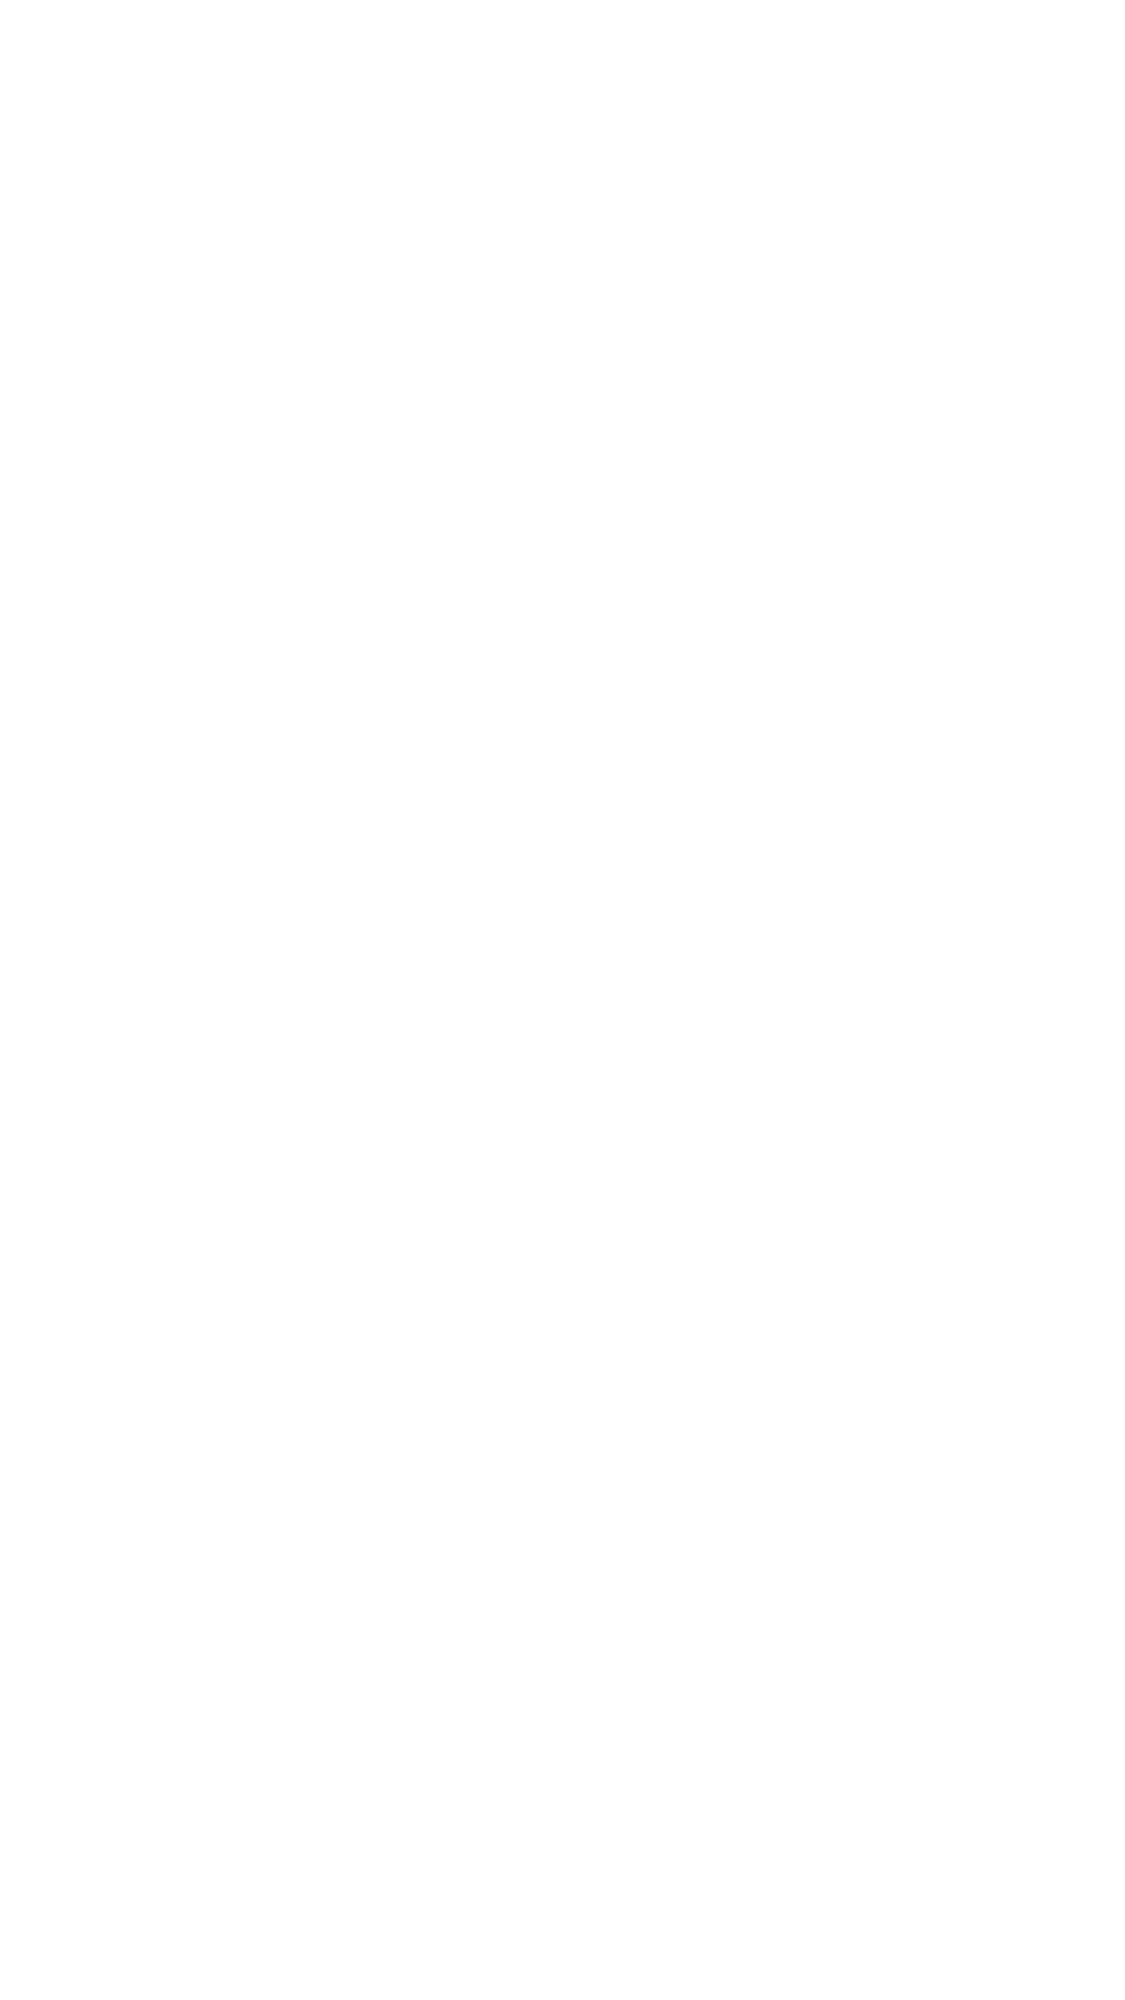

<IPython.core.display.Javascript object>


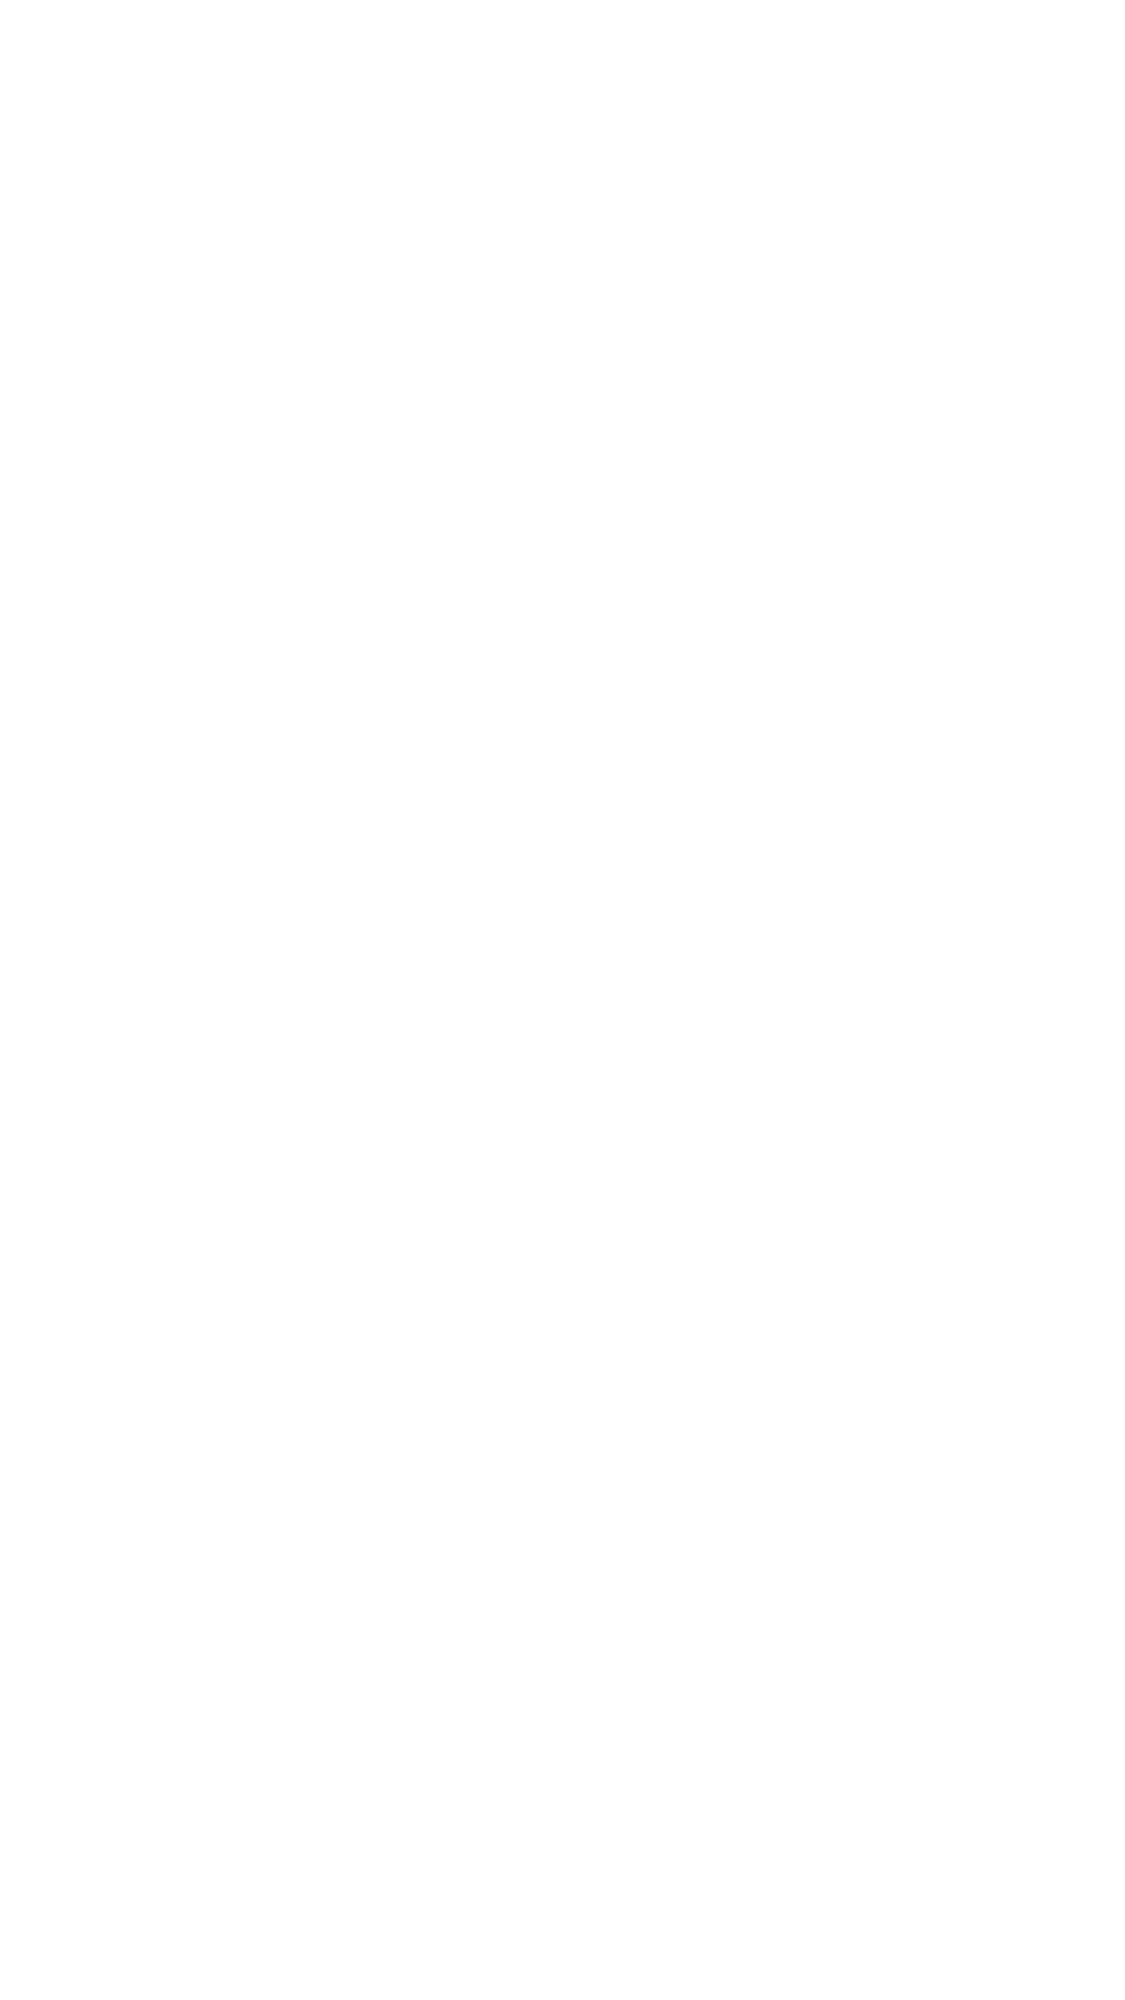

In [735]:
cww.classify(measure,s_st,target=2,predictexe=True)

In [736]:
np.array(cww.readPop(measure,s_st[1],readcali=False))[:,1]

array([0.5696, 0.407 , 0.8122, 0.7178, 0.5694, 0.407 , 0.3724, 0.718 ])

In [737]:
np.array(cww.readPop(measure,s_st[1],readcali=False))

array([[0.4304, 0.5696],
       [0.593 , 0.407 ],
       [0.1878, 0.8122],
       [0.2822, 0.7178],
       [0.4306, 0.5694],
       [0.593 , 0.407 ],
       [0.6276, 0.3724],
       [0.282 , 0.718 ]])

In [500]:
measure.predict

{'q1': <bound method KMeans.predict of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.001, verbose=0)>,
 'q2': <bound method KMeans.predict of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.001, verbose=0)>,
 'q3': <bound method KMeans.predict of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.001, verbose=0)>,
 'q4': <bound method KMeans.predict of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.001, verbose=0)>,
 'q5': <bound method KMeans.predict of KMeans(algorithm='aut

In [497]:
cww.readPop(measure,s_st[0],readcali=False)

[array([0.4976, 0.5024]),
 array([0.4952, 0.5048]),
 array([0.4838, 0.5162]),
 array([0.4832, 0.5168]),
 array([0.4968, 0.5032]),
 array([0.4856, 0.5144]),
 array([0.4948, 0.5052]),
 array([0.4924, 0.5076])]

In [500]:
ch_A, ch_B= measure.ad.getIQ()

In [501]:
cww.readPop(measure,ch_A+1j*ch_B,readcali=False)

[array([0.494, 0.506]),
 array([0.488, 0.512]),
 array([0.482, 0.518]),
 array([0.486, 0.514]),
 array([0.498, 0.502]),
 array([0.484, 0.516]),
 array([0.482, 0.518]),
 array([0.496, 0.504])]

# AC_stark

In [552]:
q_target = q3
tag = q_target.q_name
ex_delta = np.linspace(-100e6,0e6)
t_list = np.linspace(2000,5000,101)
job = Job(mrw.Ac_stark,(measure,q_target,t_list,ex_delta), tags=[tag], max=len(ex_delta))
n_pi, t_pi, s_pi = await job.done()

Output()

# 真空拉比

In [395]:
# dcstatess = {'q1':1, 'q2':1, 'q3':0.3, 'q4':0.1}
qubits = [q3,q4]
# dcstate={'q1':1, 'q2':0.5, 'q3':3, 'q4':2.8}
t_rabi = np.linspace(0,200,101)
v_rabi = np.linspace(24000,32000,3)
job = Job(mrw.vRabi,(qubits, measure, t_rabi, v_rabi,calimatrix,dcstate), tags=[qubits[0].q_name,qubits[1].q_name], max=len(t_rabi) )
t_vp,v_vp, s_vp = await job.done()

Output()

In [99]:
qubits = [q3,q4]
await mrw.dcManage(measure,'zpulse',dcstate={},readstate=None,calimatrix=calimatrix)
await mrw.dcManage(measure,'DC',dcstate=dcstate,readstate=None,calimatrix=None)

await measure.psg['psg_lo'].setValue('Output','ON')
await measure.psg['psg_ex'].setValue('Output','ON')
freq = qubits[0].f_ex-qubits[0].delta_ex[0]
await measure.psg['psg_ex'].setValue('Frequency',freq)

# dcstate={'q1':1, 'q2':0.5, 'q3':3, 'q4':2.8}
t_ra =50
v_rabi = np.linspace(0,32000,51)
job = Job(mrw.single_vRabi,(qubits, measure, v_rabi, t_ra), tags=[qubits[0].q_name,qubits[1].q_name], max=len(v_rabi) )
v_svp, s_svp = await job.done()

await measure.psg['psg_ex'].setValue('Output','OFF')

zpulse_bias =  
 [[0.]
 [0.]
 [0.]
 [0.]]
DC_bias =  
 [[-2.]
 [-4.]
 [-3.]
 [-3.]]


Output()

In [113]:
await measure.psg['psg_ex'].setValue('Frequency',freq)
await measure.psg['psg_ex'].setValue('Output','ON')

# dcstate={'q1':1, 'q2':0.5, 'q3':3, 'q4':2.8}
t_ra =14
v_ra = 27461
job = Job(mrw.single_tRabi,(qubits, measure, v_ra, np.linspace(0,500,201)), tags=[qubits[0].q_name,qubits[1].q_name], max=len(v_rabi) )
v_svp, s_svp = await job.done()

await measure.psg['psg_ex'].setValue('Output','OFF')

Output()

# Z_pulse补偿

In [732]:
t = np.linspace(4190,4230,201)
v = np.linspace(0,8000,61)
qubit = q3
job = Job(mrw.z_comwave,(qubit,measure,t,v,calimatrix,dcstate), tags=[q_target.q_name], max=len(v))
v_sz,t_sz, s_sz = await job.done()

Output()

In [730]:
t = np.linspace(4100,4300,101)
v = np.linspace(0,8000,61)
qubit = q3
job = Job(mrw.z_comwave,(qubit,measure,t,v,calimatrix,dcstate), tags=[q_target.q_name], max=len(v))
v_sz,t_sz, s_sz = await job.done()

Output()

# timing

In [513]:
qubit = q3
freq = qubit.f_ex-qubit.delta_ex[0]
await measure.psg['psg_ex'].setValue('Frequency',freq)
await measure.psg['psg_ex'].setValue('Output','ON')

t = np.linspace(300,500,201)
v_r = 2500
job = Job(mrw.z_timing,(qubit,measure,t,v_r), tags=[q_target.q_name], max=len(t))
t_sz, s_sz = await job.done()

Output()

In [386]:
qubit.delta_ex[0]

200000000.0

In [502]:
qubit.pi_len

24.2002

In [517]:
qubit = q3
freq = qubit.f_ex-qubit.delta_ex[0]
await measure.psg['psg_ex'].setValue('Frequency',freq)
await measure.psg['psg_ex'].setValue('Output','ON')

t = np.linspace(3000,3300,801)
job = Job(mrw.read_timing,(measure,qubit,t), tags=[qubit.q_name], max=len(t))
t_sz, s_sz = await job.done()

Output()

# 关闭仪器

## DcZ归零

In [601]:
await mrw.dcManage(measure,'zpluse',dcstate={},readstate=None,calimatrix=None)
await mrw.dcManage(measure,'DC',dcstate={},readstate=None,calimatrix=None)
await dc1.DC(0)
await jpadc.DC(0)
await dc3.DC(0)
await dc4.DC(0)

## 关闭通道

In [119]:
await dc1.setValue('Output','OFF')
await jpadc.setValue('Output','OFF')
await dc3.setValue('Output','OFF')
await dc4.setValue('Output','OFF')
mrw.awg_stop(awg1)
mrw.awg_stop(awg2)
mrw.awg_stop(awg3)
mrw.awg_stop(awg4)

In [120]:
await dc4.DC(2)

In [466]:
# mrw.awg_stop(awg1)
mrw.awg_stop(awg2)
mrw.awg_stop(awg3)
mrw.awg_stop(awg4)